In [1]:
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
from urllib.request import urlopen

url_base = 'http://movie.naver.com/'
url_sub= 'movie/sdb/rank/rmovie.nhn?sel=cur&date=20180313'

page=urlopen(url_base+url_sub)
soup=BeautifulSoup(page,'html.parser')
soup


<!DOCTYPE html>

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20180313" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>
<meta conte

In [3]:
soup.find_all('div', 'tit5')[0].a.string # a태그의 값을 문자열화(공백제거)

'원더'

In [4]:
soup.find_all('td','point')[0].string

'9.40'

In [5]:
date = pd.date_range('2017-5-1', periods=100, freq='D')
date

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
               '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
      

In [6]:
import urllib
from tqdm import tqdm_notebook

movie_date = [] #날짜
movie_name = [] #영화 이름
movie_point = [] #평점

url_base = 'http://movie.naver.com/'
url_sub= 'movie/sdb/rank/rmovie.nhn?sel=cur&date={date}'

#tqdm_notebook객체를 만들면 Sequence 순회에 대한 시간을 시각화해서 표현해준다.
for today in tqdm_notebook(date):
    html = url_base+url_sub
    #urllib.parse.quote -> 한글 데이터나 특수문자 문자열들을 url로 사용가능 하도록 날짜 포매팅
    response = urlopen(html.format(date = urllib.parse.quote(today.strftime('%Y%m%d'))))
    
    soup = BeautifulSoup(response, 'html.parser')
    
    #today 에 조회된 영화의 개수 가져오기(point와 영화 제목은 항상 1:1 비율이기 때문)
    end = len(soup.find_all('td', 'point'))
   
    #날짜 데이터 입력
    movie_date.extend([today for n in range(0, end)])
    #soup에서 영화 데이터 인덱스에 맞게 컴프리헨션으로 리스트에 쌓기
    movie_name.extend([soup.find_all('div','tit5')[n].a.string for n in range(0,end)])
    #soup에서 영화 평점 데이터를 순서에 맞게 컴프리헨션으로 리스트에 쌓기
    movie_point.extend([float(soup.find_all('td','point')[n].string) for n in range(0,end)])

HBox(children=(IntProgress(value=0), HTML(value='')))

In [7]:
movie = pd.DataFrame({'date': movie_date, 'name': movie_name, 'point':movie_point})
movie

,date,name,point
0,2017-05-01,히든 피겨스,9.38
1,2017-05-01,사운드 오브 뮤직,9.36
2,2017-05-01,시네마 천국,9.29
3,2017-05-01,미스 슬로운,9.26
4,2017-05-01,잉여들의 히치하이킹,9.25
5,2017-05-01,"나, 다니엘 블레이크",9.25
6,2017-05-01,바람과 함께 사라지다,9.24
7,2017-05-01,오즈의 마법사,9.23
8,2017-05-01,벤허,9.22
9,2017-05-01,흑집사 : 북 오브 더 아틀란틱,9.20


In [8]:
import numpy as np
movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
movie_best = movie_unique.sort_values(by='point',ascending=False)
movie_best.head()

,point
name,
댄서,914.60
"서서평, 천천히 평온하게",889.64
오두막,861.65
라라랜드,858.89
너의 이름은.,738.42


In [9]:
tmp=movie.query('name == ["오두막"]')
tmp

,date,name,point
41,2017-05-01,오두막,8.48
90,2017-05-02,오두막,8.53
144,2017-05-03,오두막,8.58
182,2017-05-04,오두막,8.60
230,2017-05-05,오두막,8.64
279,2017-05-06,오두막,8.64
326,2017-05-07,오두막,8.67
380,2017-05-08,오두막,8.69
422,2017-05-09,오두막,8.74
472,2017-05-10,오두막,8.74


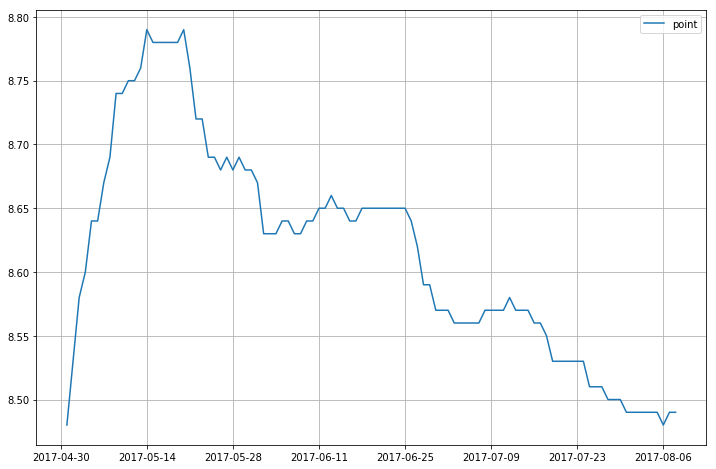

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

In [11]:
movie_pivot= pd.pivot_table(movie, index=['date'],columns=['name'],values=['point'])
movie_pivot

point                                                         \
name         10분 47 미터 500일의 썸머 7년-그들이 없는 언론 7번째 내가 죽던 날 7인의 사무라이  8 마일   
date                                                                      
2017-05-01  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-02  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-03  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-04  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-05  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-06  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-07  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-08  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-09  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-10  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-11  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-12  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-13  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-14  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-15   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-16   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-17   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-18   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-19   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-20   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-21   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-22   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-23   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-24   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-25   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-26   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-27   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-28   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-29   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-30   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
...          ...   ...      ...          ...         ...      ...   ...   
2017-07-10   NaN   NaN      NaN         8.58        7.84      NaN   NaN   
2017-07-11   NaN   NaN      NaN         8.58        7.84      NaN   NaN   
2017-07-12   NaN   NaN      NaN         8.58        7.84      NaN   NaN   
2017-07-13   NaN   NaN      NaN         8.58        7.84      NaN   NaN   
2017-07-14   NaN   NaN      NaN         8.58        7.83      NaN   NaN   
2017-07-15   NaN   NaN      NaN         8.58        7.84      NaN   NaN   
2017-07-16   NaN   NaN      NaN         8.58        7.85      NaN   NaN   
2017-07-17   NaN   NaN      NaN         8.58        7.83      NaN   NaN   
2017-07-18   NaN   NaN      NaN         8.58        7.83      NaN   NaN   
2017-07-19   NaN   NaN      NaN         8.58        7.83      NaN   NaN   
2017-07-20   NaN  7.48      NaN          NaN        7.84      NaN   NaN   
2017-07-21   NaN  7.34      NaN          NaN        7.84      NaN   NaN   
2017-07-22   NaN  7.79      NaN          NaN        7.84      NaN   NaN   
2017-07-23   NaN  7.58      NaN          NaN        7.84      NaN   NaN   
2017-07-24   NaN  7.55      NaN          NaN        7.84     9.15   NaN   
2017-07-25   NaN  7.53      NaN          NaN        7.84     9.15   NaN   
2017-07-26   NaN  7.48      NaN          NaN        7.84     9.15   NaN   
2017-07-27   NaN  7.49      NaN          NaN        7.85     9.15   NaN   
2017-07-28   NaN  7.46      NaN          NaN        7.85      NaN   NaN   
2017-07-29   NaN  7.45      NaN     

In [12]:
movie_pivot.columns = movie_pivot.columns.droplevel()   #맨위부터 삭제가능 (point가 사라질것임)

In [13]:
movie_pivot.head()

name,10분,47 미터,500일의 썸머,7년-그들이 없는 언론,7번째 내가 죽던 날,7인의 사무라이,8 마일,가디언즈 오브 갤럭시,가디언즈 오브 갤럭시 VOL. 2,겟 아웃,...,하울의 움직이는 성,하이큐!! 끝과 시작,한공주,해리가 샐리를 만났을 때,핵소 고지,행복 목욕탕,헤드윅,환상의 빛,흑집사 : 북 오브 더 아틀란틱,히든 피겨스
date,,,,,,,,,,,,,,,,,,,,,
2017-05-01,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.20,9.38
2017-05-02,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.68,NaN,NaN,9.21,9.37
2017-05-03,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.22,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.22,9.38
2017-05-04,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.15,NaN,...,NaN,NaN,8.78,NaN,NaN,8.67,NaN,NaN,9.23,9.38
2017-05-05,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.08,NaN,...,NaN,NaN,8.78,NaN,NaN,8.69,NaN,NaN,9.24,9.37


In [14]:
import platform

from matplotlib import font_manager,rc
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False

if platform.system()=='Darwin':
    rc('font',family='AppleGothic')
elif platform.system()=='Windows':
    path="c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)

else:
    print('Unknown System... Sorry~~')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


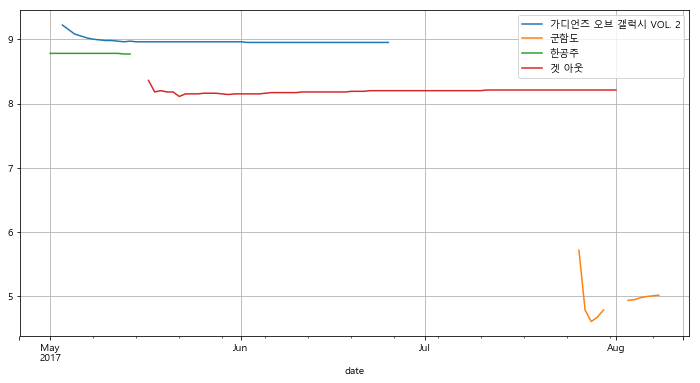

In [17]:
movie_pivot.plot(y=['가디언즈 오브 갤럭시 VOL. 2','군함도','한공주','겟 아웃'],
                 figsize=(12,6))
plt.legend(loc='best')  #legend(범례)위치 자동으로 배치 
plt.grid()
plt.show()